In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from seaborn import heatmap
from pandas.plotting import radviz

In [3]:
df=pd.read_csv('dataset.csv',sep=',')
df

,time,velocity,long_creepage,yaw_angle,wear_number
0,22.42,13.89350,-0.000157,-0.023871,29.36470
1,33.20,13.89480,-0.004125,0.008896,1.21715
2,52.35,5.57995,-0.022304,0.005678,232.37000
3,13.42,8.33109,-0.000070,-0.002027,11.80690
4,64.30,5.54999,0.001086,-0.009825,24.11540
...,...,...,...,...,...
19573,24.35,8.33345,-0.001866,0.005976,5.51155
19574,37.28,5.57796,0.039765,-0.000679,200.53400
19575,69.02,5.54770,0.000136,-0.009695,1.95644
19576,33.11,5.51696,0.018287,-0.009585,328.58000


In [4]:
columns_names = df.columns
columns_names
for i in range(len(columns_names)):
    print(str(i)+' '+str(columns_names[i]))

0 time
1 velocity
2 long_creepage
3 yaw_angle
4 wear_number


In [5]:
x= df[columns_names[[1,2,3]]]
y=df[columns_names[4]]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3916
number of training samples: 15662


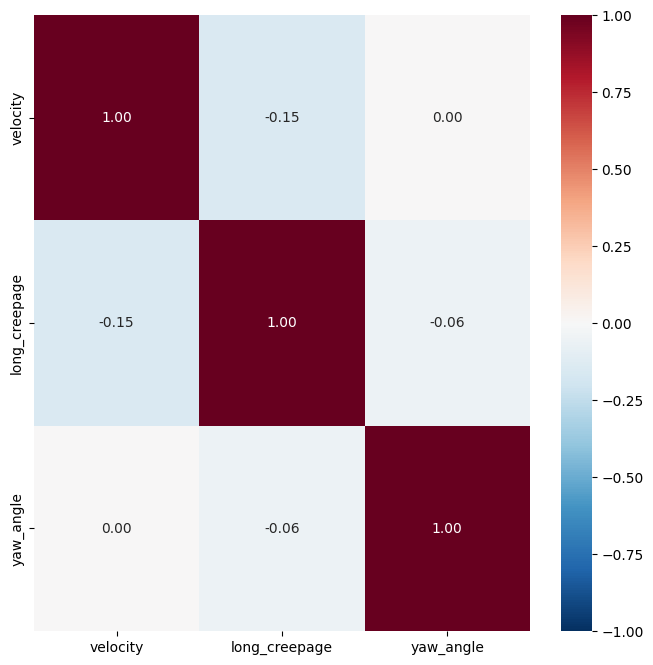

In [9]:
x.corr()

fig,ax = plt.subplots(figsize=(8,8))
ax = heatmap(x.corr(), fmt=".2f",annot=True,ax=ax,cmap='RdBu_r',vmax=1,vmin=-1)

In [10]:
fig,ax = plt.subplots(figsize=(12,12))
new_df = x.copy()
new_df['target']=y
radviz(new_df,'target',ax=ax)

<Axes: >

ValueError: Image size of 1008x408322 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1200 with 1 Axes>

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

def CVGridSearch(x_train, y_train, x_test, y_test, param_grid, cv=5):
    
    xgb_regressor = XGBRegressor(booster='gbtree', base_score=0.5, random_state=42,
                                  colsample_bylevel=1, colsample_bytree=1,
                                  gamma=0, objective='reg:squarederror', eval_metric='rmse')

    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10, verbose=False)

    best_model = grid_search.best_estimator_

    print("Najlepsze parametry znalezione podczas przeszukiwania siatki:")
    print(grid_search.best_params_)

    return best_model

param_grid = {
    'max_depth': [3, 5, 7,10,20,40],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500,1000],
}

best_model = CVGridSearch(x_train, y_train, x_test, y_test, param_grid)


c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_sto

Najlepsze parametry znalezione podczas przeszukiwania siatki:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [13]:
best_model.score(x_test,y_test)

0.9669008768368685

In [19]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Tutaj znajdują się Twoje zmienne x oraz best_model

feature_names = x.columns
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# Wyświetlanie istotności cech wraz z nazwami zmiennych
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

# Jeśli chcesz również wygenerować wykres istotności cech, odkomentuj poniższe linie:
# plt.figure(figsize=(10, 8))
# xgb.plot_importance(best_model)
# plt.show()


long_creepage: 0.7965849041938782
yaw_angle: 0.10972333699464798
velocity: 0.09369175881147385


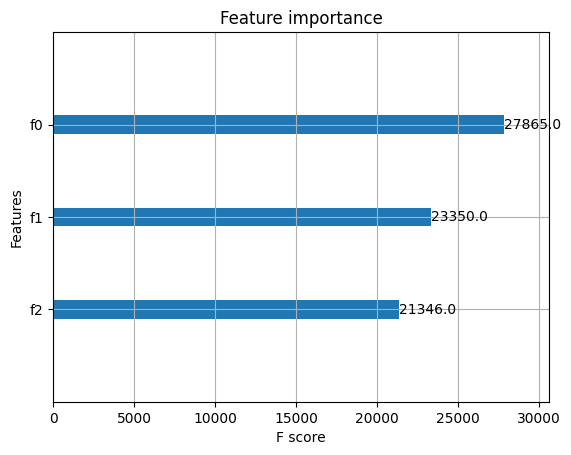

long_creepage: 0.7965849041938782
yaw_angle: 0.10972333699464798
velocity: 0.09369175881147385


In [22]:
xgb.plot_importance(best_model)
plt.show()

feature_names = x.columns

feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

names=[]
fi_value=[]


for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")
    names.append(feature_names[i])
    fi_value.append(feature_importance[i])

In [23]:
feature_importance_data=pd.DataFrame({'variable':names,'feature_importance':fi_value})

In [24]:
feature_importance_data

,variable,feature_importance
0,long_creepage,0.796585
1,yaw_angle,0.109723
2,velocity,0.093692


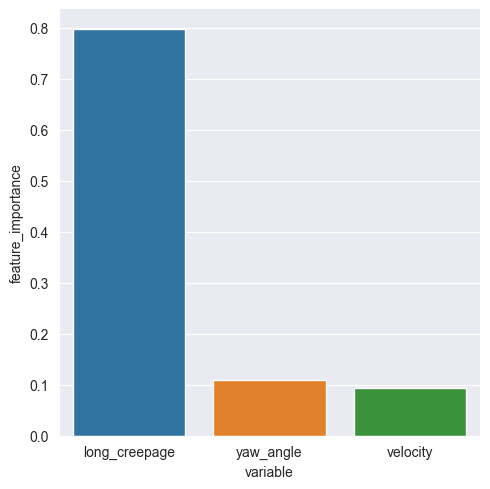

In [29]:
import seaborn as sns

sns.set_style('darkgrid')

sns.catplot(x='variable', y='feature_importance', data=feature_importance_data, kind='bar')
